# <center> **Electric Vehicle Project** </center>

## The brief: 

> *Greenwish Ltd needs a new fleet of sales rep cars for the UK.*  
> *Employees, shareholders, clients and customers all want electric vehicles considering the large milage done by reps every year.*  
> *Greenwish Ltd.’s board needs to make a decision, but it must be based on data.*  
> *Use the dataset ‘evdataset.csv’ supplied to perform your analysis.*

As part of the project I was asked to consider:

- Which make and model to buy?
- Which factors/variables are relevant to the decision?
- Show your conclusions with persuasive visuals.

## Data Cleansing

The first step is to import the data and begin my data cleansing to ensure the data is ready to work on.

In [1]:
#Import the library I am going to be using
import pandas as pd

#Create a dataframe from the csv spreadsheet provided
df = pd.read_csv(r"evdataset.csv")

In [2]:
#Check the data has been imported correctly using the head function
df.head(3)

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4


In [3]:
#Check if any of the rows contain null data
df.isnull().sum()

id                             0
Make                           0
link                           0
City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Length                         0
Width                          0
Height                         0
Wheelbase                      0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Seats                          0
dtype: int64

In [4]:
#None of the rows contain any null data, so next I will check for any duplicate values.
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [id, Make, link, City - Cold Weather, Highway - Cold Weather, Combined - Cold Weather, City - Mild Weather, Highway - Mild Weather, Combined - Mild Weather, Acceleration 0 - 100 km/h, Top Speed, Electric Range, Total Power, Total Torque, Drive, Battery Capacity, Charge Power, Charge Speed, Fastcharge Speed, Length, Width, Height, Wheelbase, Gross Vehicle Weight (GVWR), Max. Payload, Cargo Volume, Seats]
Index: []

[0 rows x 27 columns]


In [5]:
#There are 0 rows in the resulting dataframe, so I know that there were no duplicate values.

In [6]:
#Examine the columns and consider what will likely be useful for my analysis, and what could be dropped.
df.columns

Index(['id', 'Make', 'link', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats'],
      dtype='object')

Looking at the data I can already see that the unique id is not required as we have our own index if needed.

I suspect that the Drive column will not be necessary, but I want to check what data it contains before I remove it.

In [7]:
#Check what values are in the Drive column to see if they are needed
df['Drive'].unique()

array(['Rear', 'AWD', 'Front'], dtype=object)

The Drive column just contains the types of drive of the car, which won't be required for this project as all drive modes will drive on UK roads.

I am also going to drop the metrics related to size and weight, as I don't feel that they will be part of my decision process during this project as all the cars will be of a legal size for UK roads.  

Certain assumptions have to be made about the company as we have been given no further information about them. Because of this I am going to assume that the sales team don't need to carry around heavy product samples and that at most they would have a suitcase with them which would mean that the payload and cargo volume columns are unncessary as all the cars will have sufficient storage for a suitcase.  

As I am not a mechanical engineer I am not qualified to make decisions based on total power or torque.  It is safe to assume that all cars listed are legally allowed to be driven on UK roads and that therefore the power must be sufficient.  I am also not going to use power or torque as a metric in my analysis as I doubt the company would be interested in how powerful a car is against its mileage etc.  Therefore I will also drop these columns from my dataframe.

The link column contains both helpful and unhelpful data.  We need the model name from the end of the link as that is not provided for us elsewhere, however the actual link is not necessary.  I will need to strip and extract the model from the link.

In [8]:
#First I will remove the id, Drive, Length, Width, Height, Wheelbase and Gross Vehicle Weight (GVWR) columns.
df = df.drop(columns = ['id', 'Total Power', 'Total Torque', 'Drive', 'Length', 'Width', 'Height', 
                        'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload', 'Cargo Volume'])

Next I will extract the model names from the link to make the data more usable. 

I can see that the links follow the same layout:
https://ev-database.org/car/1647/Genesis-GV60-Premium

The model name is listed at the end of the link and all the links start with https://ev-database.org/car/####/

In [9]:
#So to extract the model name I will remove the first 33 characters from the link to extract just the model name
df['link'] = df['link'].str[33:]

#Next I strip the resulting string to ensure that all blank spaces are removed
df['link'].str.strip()

#Then I replace all the hyphens with spaces to make the resulting name more legible
df['link'] = df['link'].str.replace('-', ' ')

#Finally I will rename the column to Model to make it easier to read
df = df.rename(columns={'link': 'Model'})

In [10]:
#Check the head to ensure that all the changes have worked
df.head(3)

,Make,Model,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Seats
0,Genesis,Genesis GV60 Premium,390,275,330,575,355,445,7.8,185,390,77.4,11.0,49,1020,5
1,Mercedes,Mercedes EQB 350 4MATIC,330,235,280,480,300,375,6.2,160,330,69.7,11.0,46,470,7
2,Porsche,Porsche Taycan Turbo,400,305,350,580,385,470,3.2,260,415,93.4,11.0,46,1020,4


Finally it is worth updating some of the column names with the appropriate units, as currently they are unlabelled.  By following the link provided in the original data I can see that all speeds and distances are in km and km/h, while the Battery Capacity is in kWh, Charge Power is in kW, Charge Speeds are in km/h.  

In [11]:
df = df.rename(columns={'City - Cold Weather': 'City - Cold Weather (km)', 
                        'Highway - Cold Weather': 'Highway - Cold Weather (km)', 
                        'Combined - Cold Weather': 'Combined - Cold Weather (km)',
                       'City - Mild Weather': 'City - Mild Weather (km)',
                       'Highway - Mild Weather': 'Highway - Mild Weather (km)', 
                       'Combined - Mild Weather': 'Combined - Mild Weather (km)',
                       'Top Speed': 'Top Speed (km/h)',
                       'Electric Range': 'Electric Range (km)',
                       'Battery Capacity': 'Battery Capacity (kWh)',
                       'Charge Power': 'Charge Power (kW)',
                       'Charge Speed': 'Charge Speed (km/h)',
                       'Fastcharge Speed': 'Fastcharge Speed (km/h)'})

## Data Analysis

Now that the dataframe has been cleaned to remove unnecessary data, and it has been confirmed that there are no null values or duplicates, it is time to analyse the data to extract actionable information for the company.

### Which factors/variables are relevant to the decision?

In my opinion the most important factor is the electric range of the vehicle, as the longer the car can travel between charges reduces the amount of 'down time' while the sales reps are waiting for the car to charge.  The second most important factor is the charge speed.  Again this is important to reduce the amount of 'down time' the sales reps experience, with a faster charge speed being better.  The data also contains Fastcharge speed.  While this could be an important metric, I feel that fast chargers are less prevalant and so it is better to use the regular charge speed with the fastcharge speed used to differentiate between two similar vehicles.  

Although I have left acceleration and top speed in my dataframe I don't feel these are particularly important for the analysis, as all cars go above the national motorway speed limit of 70mph (As shown below).

In [12]:
#Confirmimg the minimum top speed of the vehicles is greater than the maximum national speed limit.
#Calculated in km/h by multiplying 70mph by the conversion factor of 1.6093440006147
df['Top Speed (km/h)'].min() > (70 * 1.6093440006147) 

True

Although the cars don't need to be particularly large, it is probably better to remove any 2 seaters as it may be that sales reps are transporting clients to lunch meetings etc.  

In [13]:
#Checking to see the minumum and maximum seats of the cars
print('Min Seats: ', df['Seats'].min())
print('Max Seats: ', df['Seats'].max())

Min Seats:  4
Max Seats:  9


All the cars have at least 4 seats and some have up to 9.  I am not going to disregard 4 seater cars at this point, but if I need to narrow down between a choice of cars later I will add more weight to a higher number of seats.

As I have identified the Electric Range as the most important factor I will now look into the range further.

In [14]:
#Showing mathematical data for the range column.
df['Electric Range (km)'].describe()

count    194.000000
mean     345.592784
std      101.384377
min      135.000000
25%      265.000000
50%      352.500000
75%      410.000000
max      640.000000
Name: Electric Range (km), dtype: float64

The data shows that the minimum range is 135 km while the maximum is 640km.  Only the top 25% of cars have a range higher than 410km.  As this is the most important factor in deciding which car to pick I will drop the cars which have a shorter range than 410km.  

In [15]:
#Updating the dataframe to only contain rows where the Electric Range is greater than or equal to 410
df = df.loc[df['Electric Range (km)'] >= 410]

#Reset the index
df = df.reset_index(drop=True)

#Getting the length of the new dataframe to see how many vehicles are remaining
len(df.index)

51

The results have now been pared down to 51 possible vehicles.  To further narrow down the choices I will compare the charge speeds of the cars.

In [16]:
#Showing mathematical data for the charge speed column.
df['Charge Speed (km/h)'].describe()

count    51.000000
mean     50.392157
std       4.050079
min      42.000000
25%      47.000000
50%      51.000000
75%      53.500000
max      60.000000
Name: Charge Speed (km/h), dtype: float64

I will select only the top 25% of cars for charge speed, so only cars with a charge speed of greater than 53.5.

In [17]:
#Updating the dataframe to only contain rows where the Electric Range is greater than or equal to 410
df = df.loc[df['Charge Speed (km/h)'] >= 53.5]

#Reset the index
df = df.reset_index(drop=True)

#Getting the length of the new dataframe to see how many vehicles are remaining
len(df.index)

13

Now I will select only the top 10 cars by range to pick the best one for the company by contrasting them.

In [18]:
# First sort the remaining cars by range to ensure the longest ranges are at the top of the dataframe.
df = df.sort_values(by = ['Electric Range (km)'], ascending=False).reset_index(drop = True)

#Then drop all but the top 10 results
df = df.head(10)

Using the describe function I can start to compare the remaining cars.  Looking at the standard deviation I can see that in the most important measure range the standard deviation is relatively low, the same for the Charge Speed.  However the Fastcharge Speed has quite a high standard deviation indicating some cars are much worse than others.  Therefore an easy way to narrow down the remaining selection is to drop the 5 cars with the lowest fastcharge speed. 

In [19]:
#Comparing the remaining cars using describe
df.describe()

,City - Cold Weather (km),Highway - Cold Weather (km),Combined - Cold Weather (km),City - Mild Weather (km),Highway - Mild Weather (km),Combined - Mild Weather (km),Acceleration 0 - 100 km/h,Top Speed (km/h),Electric Range (km),Battery Capacity (kWh),Charge Power (kW),Charge Speed (km/h),Fastcharge Speed (km/h),Seats
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.00000,10.000000
mean,472.000000,358.500000,414.500000,711.000000,466.000000,570.50000,6.280000,200.400000,496.000000,91.390000,11.0,55.400000,694.00000,4.800000
std,49.114379,46.371088,48.616984,73.022067,61.364123,68.37194,1.501703,33.513513,58.442755,13.071976,0.0,1.897367,121.49074,0.421637
min,435.000000,320.000000,375.000000,655.000000,415.000000,515.00000,3.300000,160.000000,450.000000,82.000000,11.0,54.000000,570.00000,4.000000
25%,440.000000,322.500000,381.250000,661.250000,418.750000,522.50000,5.825000,167.500000,452.500000,82.000000,11.0,54.000000,590.00000,5.000000
50%,450.000000,345.000000,395.000000,685.000000,450.000000,550.00000,6.400000,210.000000,477.500000,82.950000,11.0,55.000000,680.00000,5.000000
75%,485.000000,375.000000,430.000000,730.000000,485.000000,590.00000,7.450000,210.000000,515.000000,100.000000,11.0,55.750000,745.00000,5.000000
max,595.000000,470.000000,535.000000,895.000000,615.000000,740.00000,7.900000,261.000000,640.000000,120.000000,11.0,60.000000,960.00000,5.000000


In [20]:
# First sort the remaining cars by Fastcharge speed to ensure the longest ranges are at the top of the dataframe.
df = df.sort_values(by = ['Fastcharge Speed (km/h)'], ascending=False).reset_index(drop = True)

#Then drop all but the top 5 results
df = df.head(5)

## Plotting the results

Now the final cars can be plotted against each other to better compare them.

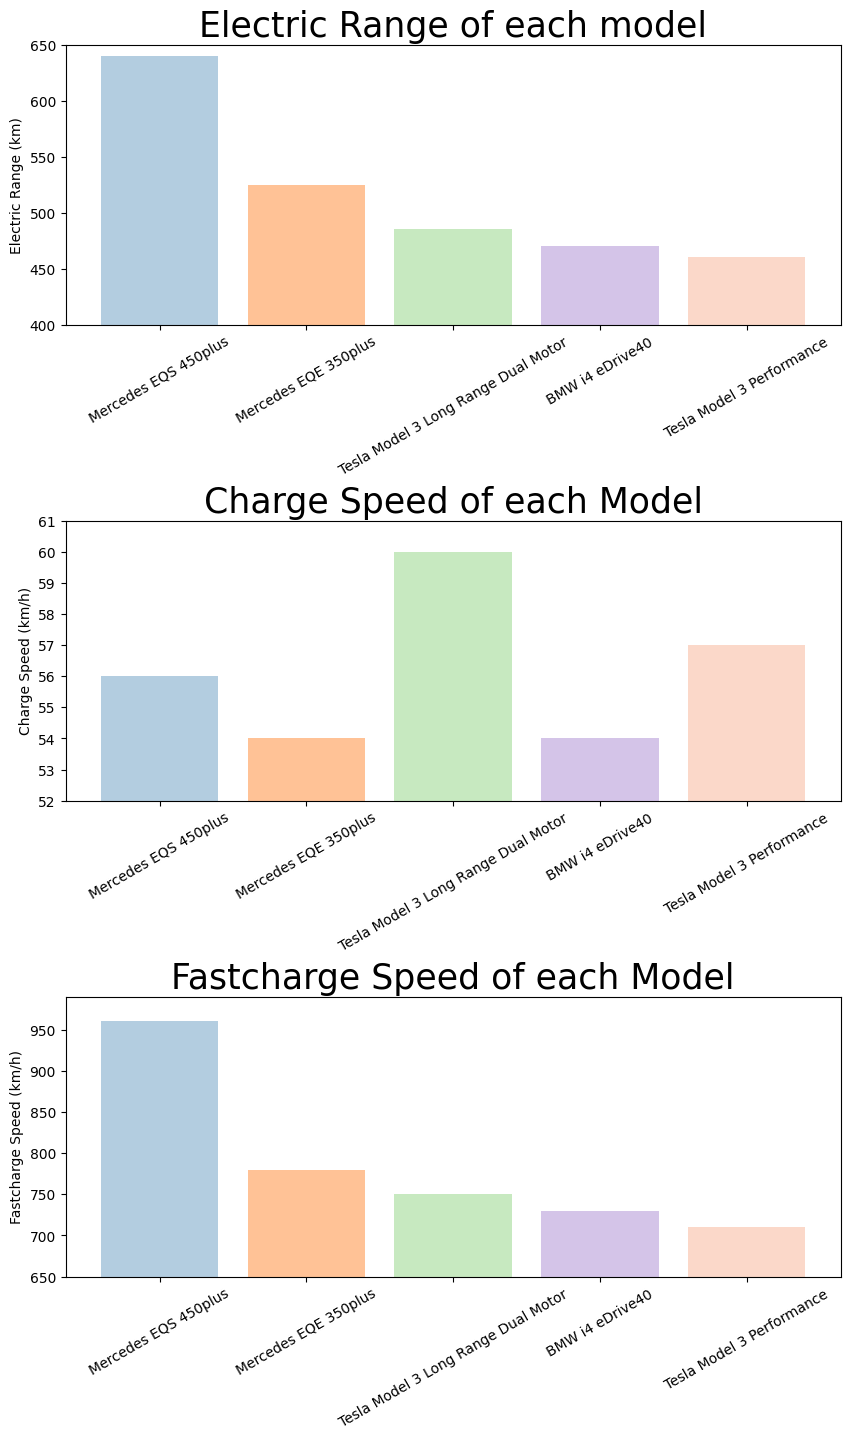

In [21]:
#Import matplotlib
import matplotlib.pyplot as plt

#Set the subplots and their size
fig, ax = plt.subplots(3, figsize=(10, 16))

ax[0].set_title('Electric Range of each model', fontsize = 25)

#I have used a colour palette that is pleasing to look at and is colour blind friendly
ax[0].bar(df['Model'], df['Electric Range (km)'], 
          color = ['#b3cde0', '#ffc296', '#c7e9c0', '#d4c4e8', '#fbd8c9'])
ax[0].set_ylabel("Electric Range (km)")
ax[0].tick_params(axis='x', rotation=30)
ax[0].set_ylim(400, 650)

ax[1].set_title('Charge Speed of each Model', fontsize = 25)
ax[1].bar(df['Model'], df['Charge Speed (km/h)'],
         color = ['#b3cde0', '#ffc296', '#c7e9c0', '#d4c4e8', '#fbd8c9'])
ax[1].set_ylabel('Charge Speed (km/h)')
ax[1].tick_params(axis='x', rotation=30)
ax[1].set_ylim(52, 61)

ax[2].set_title('Fastcharge Speed of each Model', fontsize = 25)
ax[2].bar(df['Model'], df['Fastcharge Speed (km/h)'],
         color = ['#b3cde0', '#ffc296', '#c7e9c0', '#d4c4e8', '#fbd8c9'])
ax[2].set_ylabel('Fastcharge Speed (km/h)')
ax[2].tick_params(axis='x', rotation=30)
ax[2].set_ylim(650, 990)


#Adjusting the gap between the two subplots to ensure legibility
plt.subplots_adjust(hspace=0.7)

plt.show()


## Conclusions

By looking at the graphs it is easy to see that the Mercedes EQS 450plus has the longest range.  However the Tesla Model 3 Long Range Dual Motor has a faster standard charge speed, but again the Mercedes has the faster Fastcharge speed.  Therefore based on the data given alone I would recommend the Mercedes as the overall best car for the fleet.  

# Final Recommendation:
# <center> Mercedes EQS 450plus  </center>
![](https://ev-database.org/img/auto/Mercedes_EQS_2021/Mercedes_EQS_2021-01.jpg)
<br>
<br>
<center>- Longest Range </center>
<center>- Best mix of Charge speed and Fastcharge speed </center>